In [1]:
##Making Exploratory Data Analysis based on Fifa_Cleaned

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Datasets/Fifa_cleaned.csv",
                 encoding='UTF-8', sep=',', skiprows=0, index_col=False)
df.drop(['Number','work_rate'],axis=1,inplace=True)
data = pd.DataFrame(df)
df.head(5)

,name,age,nationality,overall,potential,club,value,wage,international reputation,weak foot,...,aggression,interceptions,positioning,vision,penalties,composure,marking,gkreflexes,attacking_rates,defensive_rates
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,5.0,4.0,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,8.0,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,5.0,4.0,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,11.0,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,5.0,5.0,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,11.0,High,Medium
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,4.0,3.0,...,38.0,30.0,12.0,68.0,40.0,68.0,15.0,94.0,Medium,Medium
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,4.0,5.0,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,13.0,High,High


In [4]:
##Top 10 position
df1 =df.copy()
df1 =df1[df1["age"]<=21]
print("Top 10 Position of player younger than 21")
position= df1['position']
p=df1.groupby("position")["name"].nunique().sort_values(ascending = False)
print(p.head(10))

Top 10 Position of player younger than 21
position
ST     674
CM     572
CB     555
GK     489
LB     317
CAM    304
RM     299
LM     291
RB     279
CDM    253
Name: name, dtype: int64


Text(0.5, 1.0, 'Top 10 Position of player younger than 21')

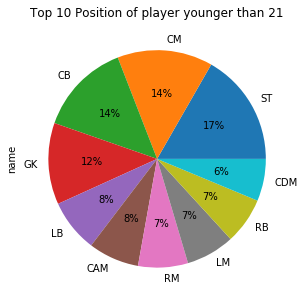

In [14]:
#Visualize Top 10 Position
p_ten= p.head(10)
V_graph= p_ten.plot(kind='pie',figsize =(10,5),autopct='%1.0f%%')
V_graph.set_title('Top 10 Position of player younger than 21')

Attacking Rates Percentage of player younger than 21


Text(0.5, 1.0, 'Attacking Rates Percentage of player younger than 21 ')

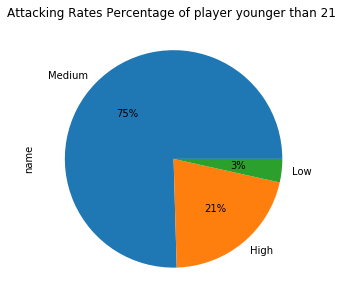

In [6]:
##See Attacking Work Rate Percentage
print("Attacking Rates Percentage of player younger than 21")
attack= df1["attacking_rates"]
a=df1.groupby("attacking_rates")["name"].nunique().sort_values(ascending = False)
a_three= a.head(3)
V_graph= a_three.plot(kind='pie',figsize =(10,5),autopct='%1.0f%%')
V_graph.set_title('Attacking Rates Percentage of player younger than 21 ')

Defensive Rates Percentage of player younger than 21


Text(0.5, 1.0, 'Defensive Rates Percentage of player younger than 21 ')

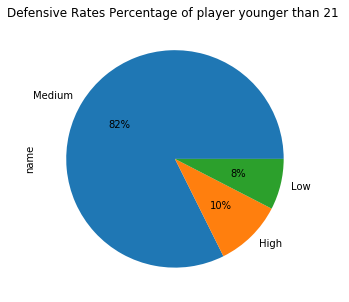

In [7]:
##See Attacking Work Rate Percentage
print("Defensive Rates Percentage of player younger than 21")
defense= df1["defensive_rates"]
d=df1.groupby("defensive_rates")["name"].nunique().sort_values(ascending = False)
d_three= d.head(3)
V_graph= d_three.plot(kind='pie',figsize =(10,5),autopct='%1.0f%%')
V_graph.set_title('Defensive Rates Percentage of player younger than 21 ')

Age Distribution:


Text(0, 0.5, 'Number of Player')

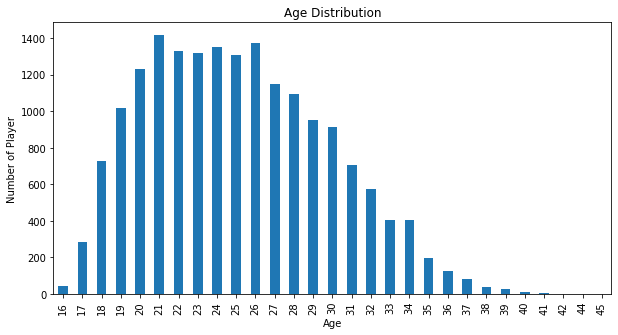

In [8]:
#Age Distribution
print("Age Distribution:")
age = df["age"].nunique()
a= df.groupby("age")["name"].nunique()
a1 = a.head(30)
V_graph= a1.plot(kind='bar',figsize =(10,5))
V_graph.set_title('Age Distribution')
V_graph.set_xlabel('Age')
V_graph.set_ylabel('Number of Player')


Text(0, 0.5, 'Number of Player')

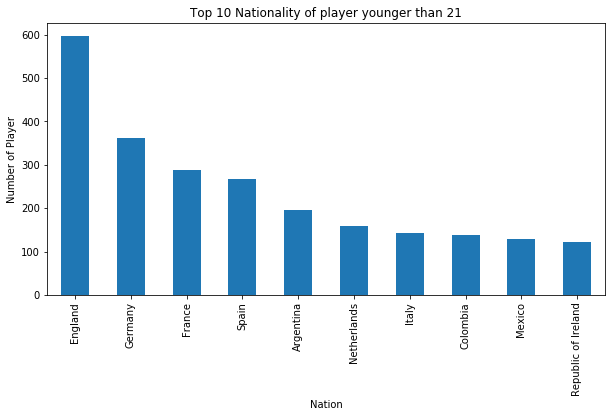

In [9]:
#Most Producing Footballer based on Nationality
nation = df1["nationality"].nunique()
n= df1.groupby("nationality")["name"].nunique().sort_values(ascending = False)
n1 = n.head(10)
V_graph= n1.plot(kind='bar',figsize =(10,5))
V_graph.set_title('Top 10 Nationality of player younger than 21')
V_graph.set_xlabel('Nation')
V_graph.set_ylabel('Number of Player')

In [10]:
##Avarage wage per club

w=df.groupby(['club']).wage.agg('sum').to_frame('total_wage')
w =w.sort_values('total_wage',ascending=False)

w.head(10)

,total_wage
club,
Real Madrid,5017000.0
FC Barcelona,4837000.0
Manchester City,3741000.0
Manchester United,3391000.0
Juventus,3292000.0
Chelsea,3249000.0
Liverpool,2647000.0
Tottenham Hotspur,2623000.0
Arsenal,2588000.0


In [11]:
##Analysing Most Potential Player

df1['difference']=df['potential']-df['overall']
def potential(p):
    if p == 0 :
        return "No Proggress"
    elif p >=1 and p<=7:
        return "Less Talented"
    elif p >=8 and p<=15:
        return "Talented"
    elif p >15:
        return "One of a Kind"

In [12]:
df1['Talent'] = df1['difference'].apply(potential)
df1.head(5)

,name,age,nationality,overall,potential,club,value,wage,international reputation,weak foot,...,positioning,vision,penalties,composure,marking,gkreflexes,attacking_rates,defensive_rates,difference,Talent
25,K. Mbappé,19,France,88,95,Paris Saint-Germain,81000000.0,100000.0,3.0,4.0,...,88.0,82.0,70.0,86.0,34.0,6.0,High,Medium,7,Less Talented
154,O. Dembélé,21,France,83,92,FC Barcelona,40000000.0,155000.0,3.0,5.0,...,79.0,84.0,75.0,75.0,42.0,13.0,High,Low,9,Talented
155,Gabriel Jesus,21,Brazil,83,92,Manchester City,41000000.0,130000.0,2.0,3.0,...,88.0,77.0,78.0,82.0,53.0,15.0,High,High,9,Talented
225,M. de Ligt,18,Netherlands,82,91,Ajax,27000000.0,11000.0,2.0,4.0,...,44.0,63.0,40.0,77.0,84.0,10.0,Medium,Medium,9,Talented
227,Arthur,21,Brazil,82,90,FC Barcelona,32500000.0,125000.0,1.0,3.0,...,77.0,82.0,69.0,84.0,65.0,12.0,Medium,Medium,8,Talented


In [13]:
df1.head(5)

,name,age,nationality,overall,potential,club,value,wage,international reputation,weak foot,...,positioning,vision,penalties,composure,marking,gkreflexes,attacking_rates,defensive_rates,difference,Talent
25,K. Mbappé,19,France,88,95,Paris Saint-Germain,81000000.0,100000.0,3.0,4.0,...,88.0,82.0,70.0,86.0,34.0,6.0,High,Medium,7,Less Talented
154,O. Dembélé,21,France,83,92,FC Barcelona,40000000.0,155000.0,3.0,5.0,...,79.0,84.0,75.0,75.0,42.0,13.0,High,Low,9,Talented
155,Gabriel Jesus,21,Brazil,83,92,Manchester City,41000000.0,130000.0,2.0,3.0,...,88.0,77.0,78.0,82.0,53.0,15.0,High,High,9,Talented
225,M. de Ligt,18,Netherlands,82,91,Ajax,27000000.0,11000.0,2.0,4.0,...,44.0,63.0,40.0,77.0,84.0,10.0,Medium,Medium,9,Talented
227,Arthur,21,Brazil,82,90,FC Barcelona,32500000.0,125000.0,1.0,3.0,...,77.0,82.0,69.0,84.0,65.0,12.0,Medium,Medium,8,Talented
